# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 1: Análisis exploratorio de datos

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545


# El cáncer representa una de las principales causas de muerte a nivel mundial, y su impacto se extiende a todas las regiones, incluyendo México. Según el Instituto Nacional de Estadística y Geografía (INEGI) (OMS), “En México se registraron 847 716 defunciones donde el 10.6 % fue por tumores malignos (89 574). La tasa de defunciones por esta causa aumentó de forma constante, al pasar de 62.04 defunciones por cada 100 mil personas en 2012, a 68.92 en 2022”


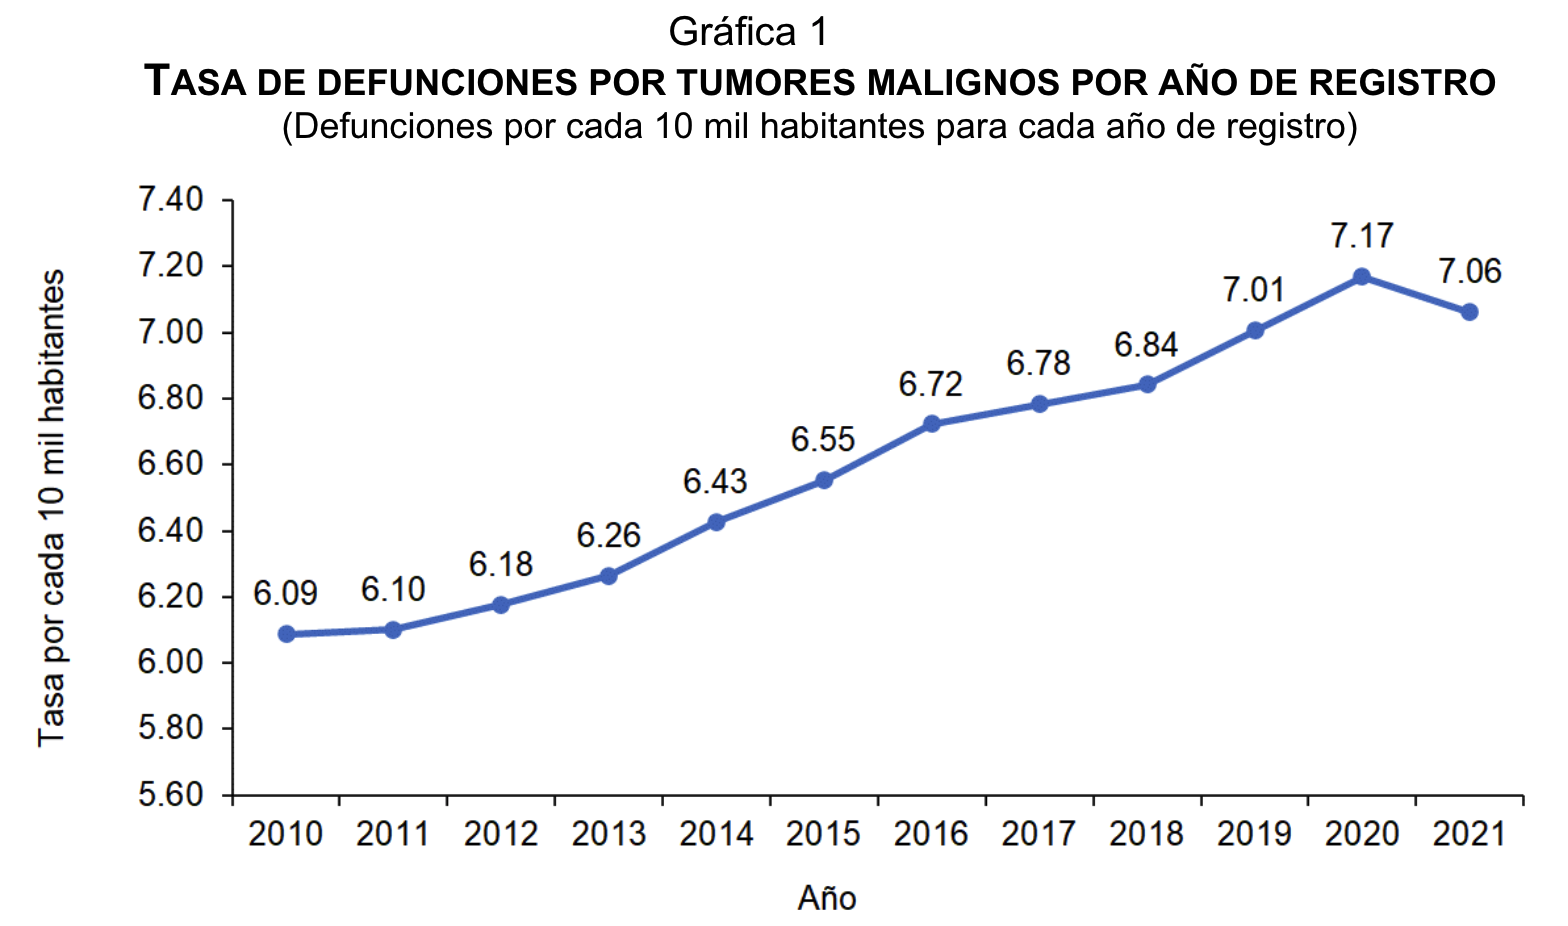

Ante esta problemática, la investigación científica se centra en desarrollar nuevos tratamientos y mejorar los existentes. Uno de los focos de atención es la proteína VEGF165 (Factor de Crecimiento Endotelial Vascular), la cual juega un papel crucial en la angiogénesis, el proceso de formación de nuevos vasos sanguíneos. En el contexto del cáncer, la sobreexpresión de VEGF165 promueve el crecimiento tumoral y la metástasis, haciendo de esta proteína un objetivo terapéutico atractivo.

Utilizando los péptidos antimicrobianos se poseen la capacidad de controlar la proliferación de microorganismos patógenos. Ciertos péptidos antimicrobianos no solo tienen actividad contra infecciones bacterianas, sino que también pueden actuar contra células tumorales. Estos péptidos pueden inducir una muerte celular programada y bloquear diversas vías de señalización que promueven el crecimiento del tumor.

El objetivo de este proyecto es desarrollar un modelo de IA capaz de identificar compuestos moleculares con alta eficiencia en la inhibición de VEGF165, lo que podría conducir al desarrollo de nuevos fármacos para el tratamiento del cáncer. Este Jupyter Notebook se centra en la fase inicial del proyecto: **Análisis Exploratorio de Datos (EDA)**.

En esta etapa, se analizarán datos de la base de datos obtenida de la pagina Data of  Cancer Therapy Peptides, http://dctpep.cpu-bioinfor.org/, la cual contiene información sobre peptidos usados en terapias contra el cancer. El análisis exploratorio nos permitirá:

* Comprender la distribución de los datos: Identificar patrones, tendencias y valores atípicos en las variables relevantes para la inhibición de VEGF165.

* Descubrir relaciones entre las variables: Explorar posibles correlaciones entre las características del dataset.

* Identificar variables importantes: Seleccionar las variables más relevantes para el desarrollo del modelo de IA.

El análisis exploratorio de datos es fundamental para la construcción de un modelo de IA efectivo. Al comprender las características de los datos, podremos tomar decisiones informadas sobre las técnicas de preprocesamiento y modelado a aplicar en las etapas posteriores del proyecto.

Este proyecto tiene el potencial de contribuir significativamente a la lucha contra el cáncer, una enfermedad que afecta a millones de personas en todo el mundo, incluyendo México. El desarrollo de nuevos fármacos usando peptidos que inhiban la acción de VEGF165 y asi mejorar la eficacia de los tratamientos y ofrecer nuevas esperanzas a los pacientes.

In [43]:
###Start code here####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import os

In [4]:
pd_cancer_db = pd.read_csv('/content/peptide_library_all.csv')
pd_cancer_db.head(5)

,DCTPep_ID,DRAMP_ID,CancerPPD_ID,DBAASP_ID,Cppsite_ID,Peptide_Name,Sequence,Sequence_Length,UniProt_ID,PubChem_CID,...,Boman_Index,Half_Life,Aliphatic_Index,Extinction_Coefficient_cystines,Absorbance_280nm,Literature,Patent_ID,Patent_Title,Other_Information,Other_Published_ID
0,DCTPep00001,DRAMP02912,Not available,1485,Not available,SMAP-29,RGLRRLGRKIAHGVKKYGPTVLRIIRIA,28,Not available,16130512,...,-6364,Mammalian: 1 hour##Yeast: 2 min##E.coli: 2 min,125.36,1490,55.19,10601638++SMAP-29: a potent antibacterial and ...,Not available,Not available,Not available,Not available
1,DCTPep00002,Not available,Not available,Not available,Not available,CA-MA,KWKLFKKIGIGKFLHSAKKF,20,Not available,Not available,...,-1227,Mammalian: 1.3 hour##Yeast: 3 min##E.coli: 2 min,83.00,5500,289.47,10675500++Effects of the hinge region of cecro...,Not available,Not available,Not available,Not available
2,DCTPep00003,Not available,Not available,Not available,Not available,CA-MA3,KWKLFKKIGPGKFLHSAKKF,20,Not available,Not available,...,-1719,Mammalian: 1.3 hour##Yeast: 3 min##E.coli: 2 min,63.50,5500,289.47,10675500++Effects of the hinge region of cecro...,Not available,Not available,Not available,Not available
3,DCTPep00004,Not available,Not available,Not available,Not available,CA-MA1,KWKLFKKIKFLHSAKKF,17,Not available,Not available,...,-1907,Mammalian: 1.3 hour##Yeast: 3 min##E.coli: 2 min,74.71,5500,343.75,10675500++Effects of the hinge region of cecro...,Not available,Not available,Not available,Not available
4,DCTPep00005,Not available,Not available,Not available,Not available,CA-MA2,KWKLFKKIPKFLHSAKKF,18,Not available,Not available,...,-1907,Mammalian: 1.3 hour##Yeast: 3 min##E.coli: 2 min,70.56,5500,323.53,10675500++Effects of the hinge region of cecro...,Not available,Not available,Not available,Not available


Las variables anteriores se definen de la siguienmte manera

- DCTPep_ID: El campo proporciona el número de acceso único que se vincula a la entrada DCTPep correspondiente.
- DRAMP_ID: El campo proporciona el número de acceso único que se vincula a la entrada DRAMP correspondiente.
- CancerPPD_ID: El campo proporciona el número de acceso único que se vincula a la entrada CancerPPD correspondiente.
- DBAASP_ID: El campo proporciona el número de acceso único que se vincula a la entrada DBAASP correspondiente.
- Cppsite_ID: El campo proporciona el número de acceso único que se vincula a la entrada Cppsite correspondiente.
- Peptide_Name: Nombre de cada péptido en DCTPep.
- Sequence: La secuencia peptídica que se representa mediante códigos de una sola letra. Los L-aminoácidos se expresan en mayúsculas y los D-aminoácidos se expresan en letras minúsculas. X se refiere a los aminoácidos modificados.
- Sequence_Length: Número de residuos en la secuencia peptídica.
- UniProt_ID: Proporciona los enlaces de acceso que dirijan a las entradas externas de Uniprot.
- PubChem_CID: CID de PubChem
- Origin: El organismo donde se extrajeron o aislaron los péptidos o proteínas.
- Type: Los péptidos se dividen en péptidos nativos y péptidos sintéticos según su origen.
- Hemolytic_Activity: Información sobre la actividad hemolítica frente a los glóbulos rojos (RBC).
- Cytotoxicity: Información de citotoxicidad frente a líneas celulares normales (no cancerosas).
- Binding_Target: Sitio de acción de los péptidos contra las células cancerosas.
- Affinity: Afinidad de unión entre péptidos y targets.
- Mechanism: Mecanismo de los péptidos que actúan como agentes anticancerígenos.
- Nature: Clasificación de la actividad biológica. Además de anticancerígeno, también incluye antibacteriano, antifúngico, antiviral...
- *:
- Predicted_Structure_ID: Estructura predicha por Alphafold, Mostrar con Mol*viewer, haga clic para descargar los archivos PDB.
- PDB_ID: Proporcione enlaces de acceso que dirijan a la entrada PDB correspondiente.
- Structure: Estructura predicha por Alphafold, Mostrar con Mol*viewer, haga clic para descargar los archivos PDB.
- Classification: Clasificados por tipo de péptido o mecanismo. Incluyendo péptidos dirigidos molecularmente, péptidos que penetran en las células, péptidos que se dirigen a tumores, mecanismo dirigido a la membrana, mecanismo de apoptosis, mecanismo - antiangiogénico...
- Helicity: Porcentaje de α hélices
- Linear_Cyclic: Peptido ciclico o linear
- Disulfide_Bond: Enlace de disulfuro (DSB) u otro enlace, como el enlace de cadena lateral-cadena principal (SMB), enlace peptídico N-C termini (NCB).
- N-terminal_Modification: Las modificaciones del terminal N según las referencias
- C-terminal_Modification: Las modificaciones del terminal C según las referencias
- Other_Modification: Aminoácidos especiales (de 20 aminoácidos comunes).
- Chiral: Los aminoácidos L/D consisten en péptidos.
- Mass: Masa
- Formula: Formula del péptido
- Absent_amino_acids: Aminoacidos no incluidos
- Common_amino_acids: Animoacido mas comun en la sequencia
- pI:
- Basic_residues:
- Acidic_residues:
- Net_charge:
- Polar_residues:
- Hydrophobic_residues:
- Hydrophobicity:
- Boman_Index:
- Half_Life:
- Aliphatic_Index:
- Extinction_Coefficient_cystines:
- Absorbance_280nm:
- Literature: La información de los péptidos proviene de todo tipo de literatura o patentes, y la sección proporciona la forma de encontrar el texto completo.
- Patent_ID: Numero de patente
- Patent_Title: Nombre de la patente
- Other_Information: Otra informacion
- Other_Published_ID: Otros identificadores publicados





In [5]:
pd_cancer_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6107 entries, 0 to 6106
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DCTPep_ID                        6107 non-null   object 
 1   DRAMP_ID                         6107 non-null   object 
 2   CancerPPD_ID                     6107 non-null   object 
 3   DBAASP_ID                        6098 non-null   object 
 4   Cppsite_ID                       6107 non-null   object 
 5   Peptide_Name                     5876 non-null   object 
 6   Sequence                         6107 non-null   object 
 7   Sequence_Length                  6107 non-null   int64  
 8   UniProt_ID                       6107 non-null   object 
 9   PubChem_CID                      6107 non-null   object 
 10  Origin                           6067 non-null   object 
 11  Type                             6069 non-null   object 
 12  Hemolytic_Activity  

Este dataset contiene 6106 registros, con 51 variables, ninguna de estas variables contiene datos faltantes.

In [6]:
pd_cancer_db.describe()

,Sequence_Length,Mass,pI,Basic_residues,Acidic_residues,Net_charge,Polar_residues,Hydrophobic_residues,Hydrophobicity,Boman_Index,Aliphatic_Index,Extinction_Coefficient_cystines,Absorbance_280nm
count,6107.000000,6.107000e+03,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000
mean,17.314721,2.264222e+05,9.344870,4.203209,1.052890,3.150319,3.749304,6.157852,-32.957414,-3332.758638,85.402055,3750.612412,278.635115
std,9.884554,1.321152e+05,2.926218,3.487445,1.765759,3.663410,4.453515,4.145918,117.034008,4705.836340,58.691875,5254.834058,557.152633
min,2.000000,-5.760000e+02,3.170000,0.000000,0.000000,-9.000000,0.000000,0.000000,-450.000000,-37732.000000,0.000000,0.000000,0.000000
25%,10.000000,1.366115e+05,6.340000,1.000000,0.000000,0.000000,1.000000,3.000000,-99.000000,-5963.500000,43.330000,0.000000,0.000000
50%,15.000000,1.988900e+05,10.350000,4.000000,0.000000,3.000000,3.000000,6.000000,-32.500000,-1950.000000,78.000000,1490.000000,93.130000
75%,23.000000,3.018085e+05,11.650000,6.000000,1.000000,6.000000,5.000000,9.000000,44.480000,24.000000,123.330000,5625.000000,326.150000
max,97.000000,1.230031e+06,13.780000,35.000000,20.000000,35.000000,41.000000,40.000000,420.000000,19680.000000,390.000000,55000.000000,11000.000000


Ya que el proyecto se enfoca en las moleculas que interactuan con la molecula VEGF, se buscaron los registros que se asocian a esta molecula

In [7]:
df_vegf =pd_cancer_db[pd_cancer_db['Binding_Target'].str.contains('VEGF')]

print(df_vegf[["Sequence", "Binding_Target"]])

                      Sequence Binding_Target
2397          RRPKGRGKRRREKQRP        VEGF165
2398    RRPKGRGKRRREKQRPCDKPRR        VEGF165
2399    RRPKGRGKRRREKQRPSDKPRR        VEGF165
2400    RRPKGRGKRRREKQRPDAVPRR        VEGF165
2401      CKGRGKRCREKQRPSDKPRR        VEGF165
2402       KGRGKRRREKQRPCDKPRR        VEGF165
2403            RRREKQRPCDKPRR        VEGF165
2404        KGRGKRRREKQRPSDKPR        VEGF165
2405         KGRGKRRREKQRPSDKP        VEGF165
2406       KGRGKRRREKQRPSDKPRR        VEGF165
2407    RRPKGRAAARREKQRPSDKPRR        VEGF165
2408    RRPKGRGKRAAAKQRPSDKPRR        VEGF165
2409       AGRGKRRREKQRPSDKPRR        VEGF165
2410       KGRGARRREKQRPSDKPRR        VEGF165
2411       KGAGKRRREKQRPSDKPRR        VEGF165
2412       KGRGKARREKQRPSDKPRR        VEGF165
2413       KGRGKRRREKQGPSDKPRR        VEGF165
2414       KGRGKRRREKQRPSDAPAA        VEGF165
2415       KGRGKRAAEAQRPSDKPRR        VEGF165
2416       KGRGKRAAEKQAPSDKPRR        VEGF165
2417       AGRGARAAEAQRPSDKPRR    

In [8]:
Valores_fantantes = pd_cancer_db.isnull().sum()
Valores_faltantes_procentaje = (Valores_fantantes / len(pd_cancer_db)) * 100
print("Porcentaje de valores faltantes por columna:\n", Valores_faltantes_procentaje)

Porcentaje de valores faltantes por columna:
 DCTPep_ID                           0.000000
DRAMP_ID                            0.000000
CancerPPD_ID                        0.000000
DBAASP_ID                           0.147372
Cppsite_ID                          0.000000
Peptide_Name                        3.782545
Sequence                            0.000000
Sequence_Length                     0.000000
UniProt_ID                          0.000000
PubChem_CID                         0.000000
Origin                              0.654986
Type                                0.622237
Hemolytic_Activity                  0.000000
Cytotoxicity                        0.000000
Binding_Target                      0.000000
Affinity                            0.000000
Mechanism                           0.000000
Nature                              0.016375
*                                   0.000000
Predicted_Structure_ID              0.000000
PDB_ID                              0.000000
Structure

In [9]:
eda_data_antes=pd_cancer_db.copy()

In [10]:
print("\nValores faltantes antes del preprocesamiento:\n", eda_data_antes.isnull().sum().sum())


Valores faltantes antes del preprocesamiento:
 5759


In [11]:
eda_data_Despues=eda_data_antes.copy()

In [12]:
for col in eda_data_Despues.columns:
    if eda_data_Despues[col].isnull().sum() > 0:
        if eda_data_Despues[col].dtype in ["int64", "float64"]:
            eda_data_Despues[col].fillna(eda_data_Despues[col].median(), inplace=True)
        else:
            eda_data_Despues[col].fillna(eda_data_Despues[col].mode()[0], inplace=True)

<ipython-input-12-c08d64508316>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eda_data_Despues[col].fillna(eda_data_Despues[col].mode()[0], inplace=True)


In [13]:
print("\nValores faltantes después del preprocesamiento:\n", eda_data_Despues.isnull().sum().sum())


Valores faltantes después del preprocesamiento:
 0


In [14]:
def Remover_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    #IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * (Q3 - Q1)
    upper_bound = Q3 + 1.5 * (Q3 - Q1)
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [23]:
Numerico = eda_data_Despues.describe()
Categorico = eda_data_Despues.describe(include=["object"])
print("\nNumerico:\n", Numerico)
print("\nCategorico:\n", Categorico)


Numerico:
        Sequence_Length          Mass           pI  Basic_residues  \
count      6107.000000  6.107000e+03  6107.000000     6107.000000   
mean         17.314721  2.264222e+05     9.344870        4.203209   
std           9.884554  1.321152e+05     2.926218        3.487445   
min           2.000000 -5.760000e+02     3.170000        0.000000   
25%          10.000000  1.366115e+05     6.340000        1.000000   
50%          15.000000  1.988900e+05    10.350000        4.000000   
75%          23.000000  3.018085e+05    11.650000        6.000000   
max          97.000000  1.230031e+06    13.780000       35.000000   

       Acidic_residues   Net_charge  Polar_residues  Hydrophobic_residues  \
count      6107.000000  6107.000000     6107.000000           6107.000000   
mean          1.052890     3.150319        3.749304              6.157852   
std           1.765759     3.663410        4.453515              4.145918   
min           0.000000    -9.000000        0.000000       

In [24]:
Columnas_Numericas = eda_data_Despues.select_dtypes(include=["int64", "float64"]).columns
Columnas_Categoricas = eda_data_Despues.select_dtypes(include=["object"]).columns
print("\nColumnas numéricas:\n", Columnas_Numericas)
print("\nColumnas categóricas:\n", Columnas_Categoricas)


Columnas numéricas:
 Index(['Sequence_Length', 'Mass', 'pI', 'Basic_residues', 'Acidic_residues',
       'Net_charge', 'Polar_residues', 'Hydrophobic_residues',
       'Hydrophobicity', 'Boman_Index', 'Aliphatic_Index',
       'Extinction_Coefficient_cystines', 'Absorbance_280nm'],
      dtype='object')

Columnas categóricas:
 Index(['DCTPep_ID', 'DRAMP_ID', 'CancerPPD_ID', 'DBAASP_ID', 'Cppsite_ID',
       'Peptide_Name', 'Sequence', 'UniProt_ID', 'PubChem_CID', 'Origin',
       'Type', 'Hemolytic_Activity', 'Cytotoxicity', 'Binding_Target',
       'Affinity', 'Mechanism', 'Nature', '*', 'Predicted_Structure_ID',
       'PDB_ID', 'Structure', 'Classification', 'Helicity', 'Linear_Cyclic',
       'Disulfide_Bond', 'N-terminal_Modification', 'C-terminal_Modification',
       'Other_Modification', 'Chiral', 'Formula', 'Absent_amino_acids',
       'Common_amino_acids', 'Half_Life', 'Literature', 'Patent_ID',
       'Patent_Title', 'Other_Information', 'Other_Published_ID'],
      dtype='

In [26]:
# Eliminar valores Outliers
for col in Columnas_Numericas:
    original_size = len(eda_data_Despues)
    eda_data_Despues = Remover_outliers_IQR(eda_data_Despues, col)
    new_size = len(eda_data_Despues)
    print(f"Registros eliminados en {col}: {original_size - new_size}")

Registros eliminados en Sequence_Length: 106
Registros eliminados en Mass: 24
Registros eliminados en pI: 0
Registros eliminados en Basic_residues: 63
Registros eliminados en Acidic_residues: 770
Registros eliminados en Net_charge: 0
Registros eliminados en Polar_residues: 442
Registros eliminados en Hydrophobic_residues: 55
Registros eliminados en Hydrophobicity: 134
Registros eliminados en Boman_Index: 199
Registros eliminados en Aliphatic_Index: 18
Registros eliminados en Extinction_Coefficient_cystines: 236
Registros eliminados en Absorbance_280nm: 239


In [28]:
for col in Columnas_Numericas:
    if (eda_data_Despues[col] > 0).all():
        eda_data_Despues[col], _ = boxcox(eda_data_Despues[col] + 1e-6)
        print(f"Transformación Box-Cox aplicada en {col}")

Transformación Box-Cox aplicada en Sequence_Length
Transformación Box-Cox aplicada en pI


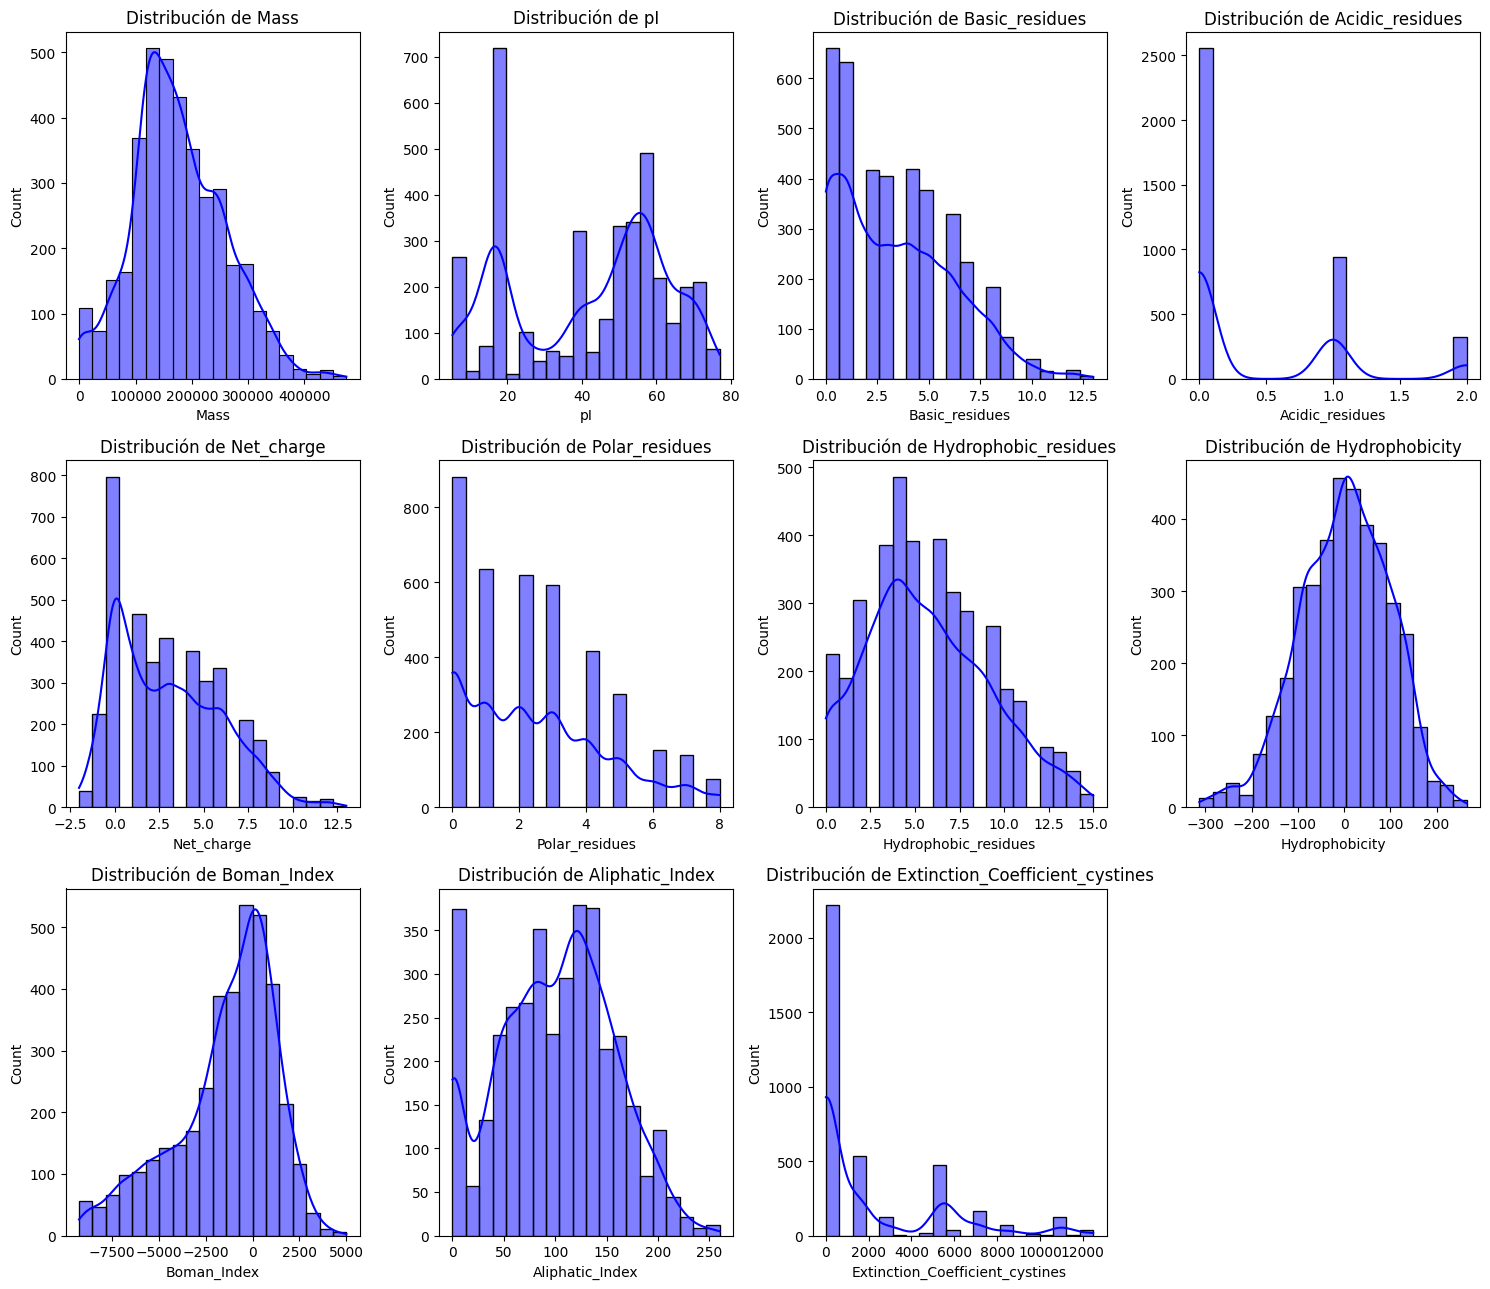

In [54]:
plt.figure(figsize=(15, 13))
for i, col in enumerate(Columnas_Numericas[1:12]):
    plt.subplot(3, 4, i + 1)
    sns.histplot(eda_data_Despues[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribución de {col}")
    plt.tight_layout()
plt.show()

#Conclusiones